In [2]:
import albumentations as A
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

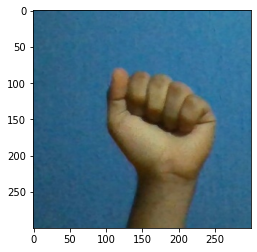

In [3]:
image = Image.open('E:\Data Augmentation\Entrenamiento\A\A_0.jpg')
image = np.array(image)
plt.imshow(image)

In [4]:
def visualize(image):
    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.imshow(image)

AttributeError: 'numpy.ndarray' object has no attribute 'save'

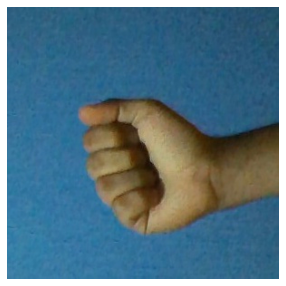

In [83]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.PiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.Sharpen(),
            A.Emboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ]) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)
saved_image = augmented_image
saved_image.save(augmented_image+".jpg")